In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/implementation_sample_2.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
DS={}
for ds_index in range(1,8):
    DS["DS"+str(ds_index)]=pd.concat([data[data["class"]=="bot"],data[data["class"]=="human"].sample(60364)])
    DS["DS"+str(ds_index)]= DS["DS"+str(ds_index)].sample(frac=1).reset_index(drop=True)

In [ ]:
X={}
y={}
for ds_index in range(1,8):
  X["train"+str(ds_index)], X["test"+str(ds_index)], y["train"+str(ds_index)], y["test"+str(ds_index)] = train_test_split(DS["DS"+str(ds_index)].drop(['class'],axis=1), DS["DS"+str(ds_index)]['class'], test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifer={}
for ds_index in range(1,8):
  classifer["RF"+str(ds_index)]=RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
  classifer["RF"+str(ds_index)].fit(X["train"+str(ds_index)], y["train"+str(ds_index)])

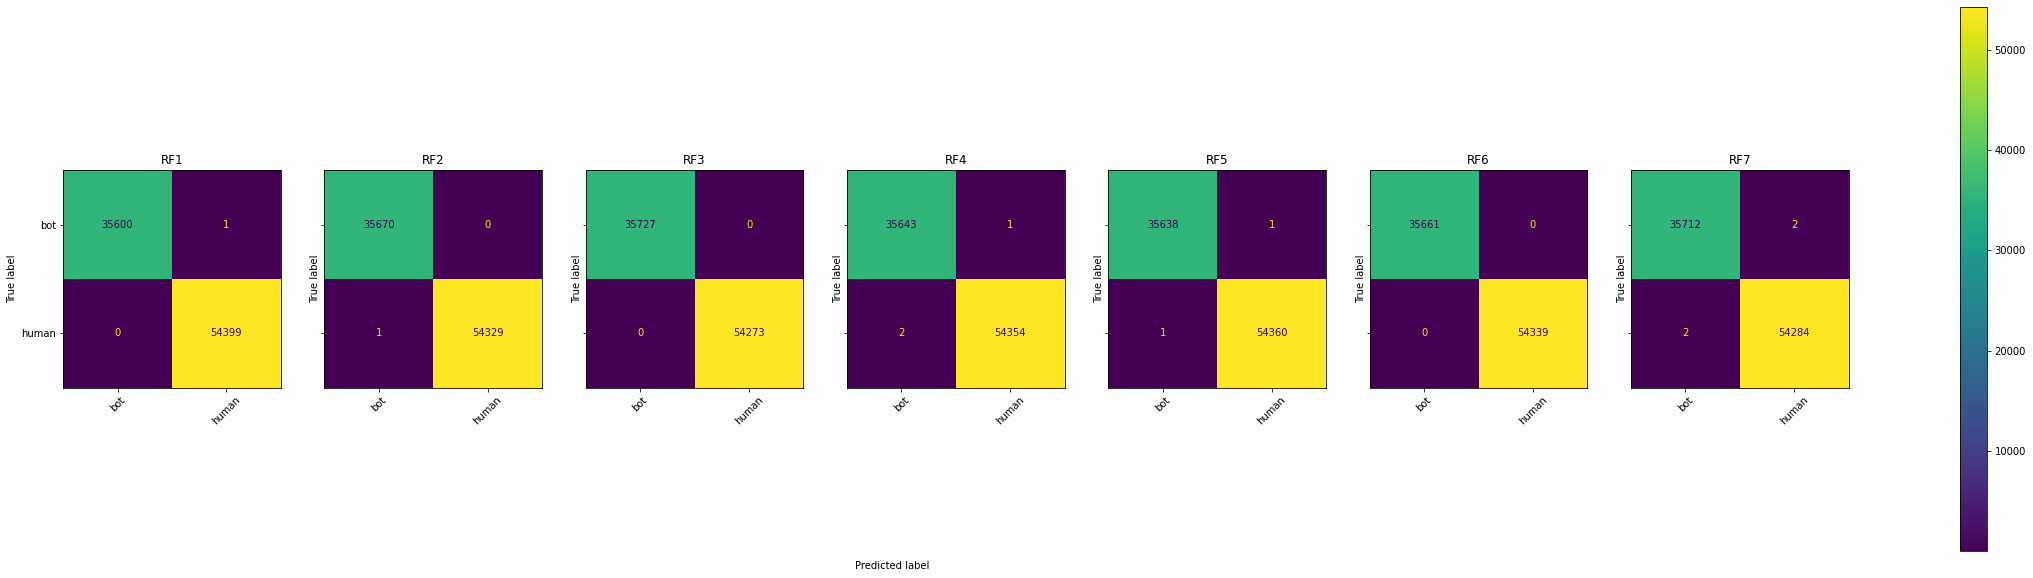

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,1.000000,0.999972,0.999986,35601,0.999982,1.000000,0.999991,54399,0.999989
1,RF2,0.999972,1.000000,0.999986,35670,1.000000,0.999982,0.999991,54330,0.999989
2,RF3,1.000000,1.000000,1.000000,35727,1.000000,1.000000,1.000000,54273,1.000000
3,RF4,0.999944,0.999972,0.999958,35644,0.999982,0.999963,0.999972,54356,0.999967
4,RF5,0.999972,0.999972,0.999972,35639,0.999982,0.999982,0.999982,54361,0.999978
5,RF6,1.000000,1.000000,1.000000,35661,1.000000,1.000000,1.000000,54339,1.000000
6,RF7,0.999944,0.999944,0.999944,35714,0.999963,0.999963,0.999963,54286,0.999956


In [ ]:
y_predict={}
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["train"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["train"+str(i+1)])
    cf_matrix = confusion_matrix(y["train"+str(i+1)], y_predict["train"+str(i+1)])
    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["train"+str(i+1)], y_predict["train"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

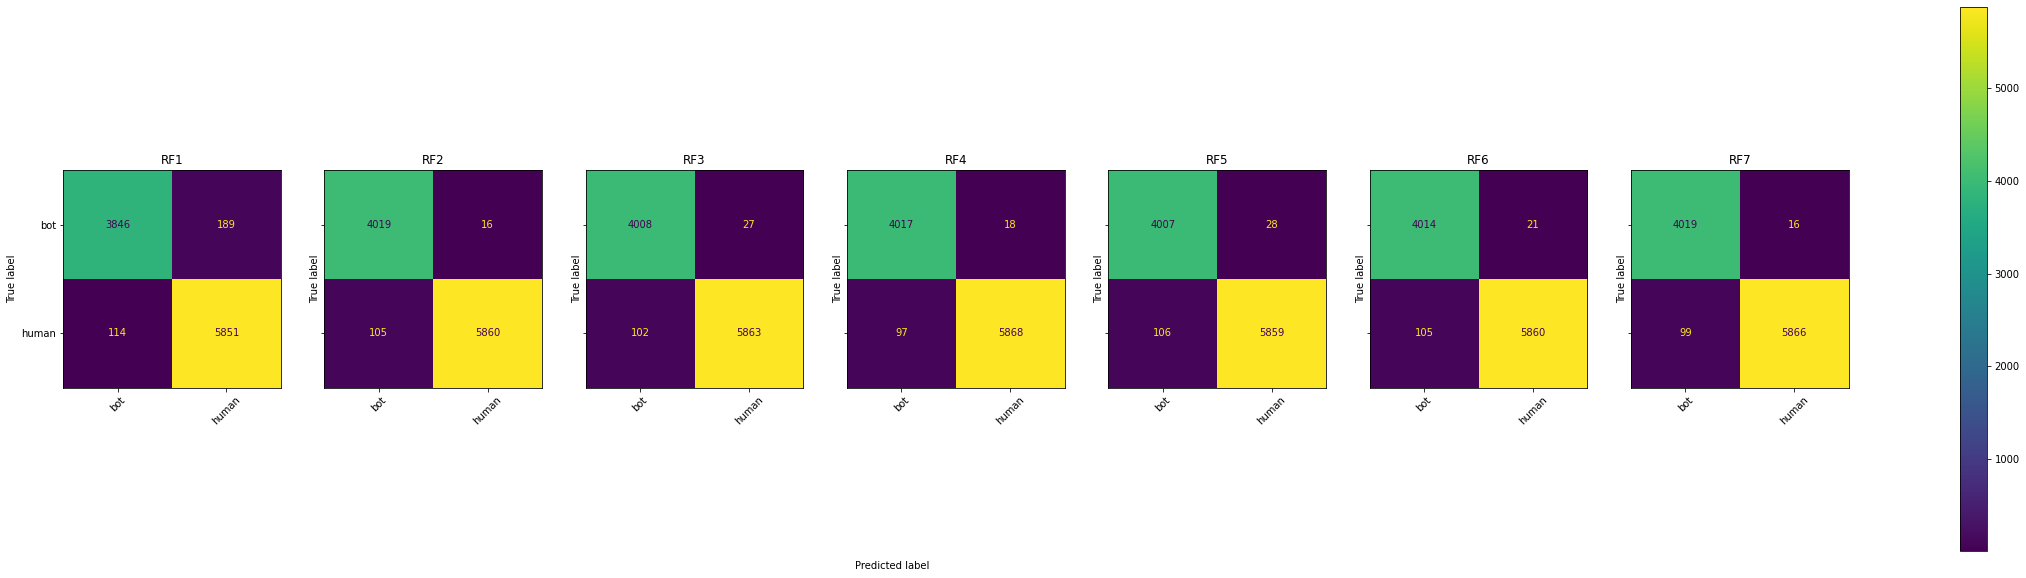

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.971212,0.953160,0.962101,4035,0.968709,0.980889,0.974761,5965,0.9697
1,RF2,0.974539,0.996035,0.985170,4035,0.997277,0.982397,0.989781,5965,0.9879
2,RF3,0.975182,0.993309,0.984162,4035,0.995416,0.982900,0.989119,5965,0.9871
3,RF4,0.976422,0.995539,0.985888,4035,0.996942,0.983738,0.990296,5965,0.9885
4,RF5,0.974228,0.993061,0.983554,4035,0.995244,0.982230,0.988694,5965,0.9866
5,RF6,0.974508,0.994796,0.984547,4035,0.996429,0.982397,0.989363,5965,0.9874
6,RF7,0.975959,0.996035,0.985895,4035,0.997280,0.983403,0.990293,5965,0.9885


In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test1"])
    cf_matrix = confusion_matrix(y["test1"], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["test1"], y_predict["test"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

In [ ]:
print(len(y_predict["test1"]))

10000


In [ ]:
output_prediction=list()
for index,value in enumerate(y_predict["test1"]):
  if [y_predict["test1"][index],y_predict["test2"][index],y_predict["test3"][index],y_predict["test4"][index],y_predict["test5"][index],y_predict["test6"][index],y_predict["test7"][index]].count("bot")>3:
    output_prediction.append("bot")
  else:
    output_prediction.append("human")
output_prediction = np.array(output_prediction)

              precision    recall  f1-score   support

         bot       0.97      1.00      0.99      4035
       human       1.00      0.98      0.99      5965

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



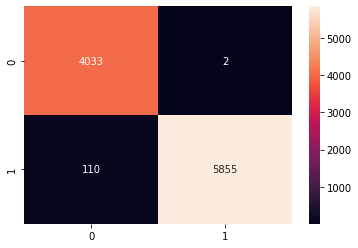

In [ ]:
print(classification_report(y["test1"], output_prediction))
cm = confusion_matrix(y["test1"], output_prediction)
sns.heatmap(cm, annot=True,fmt="d")

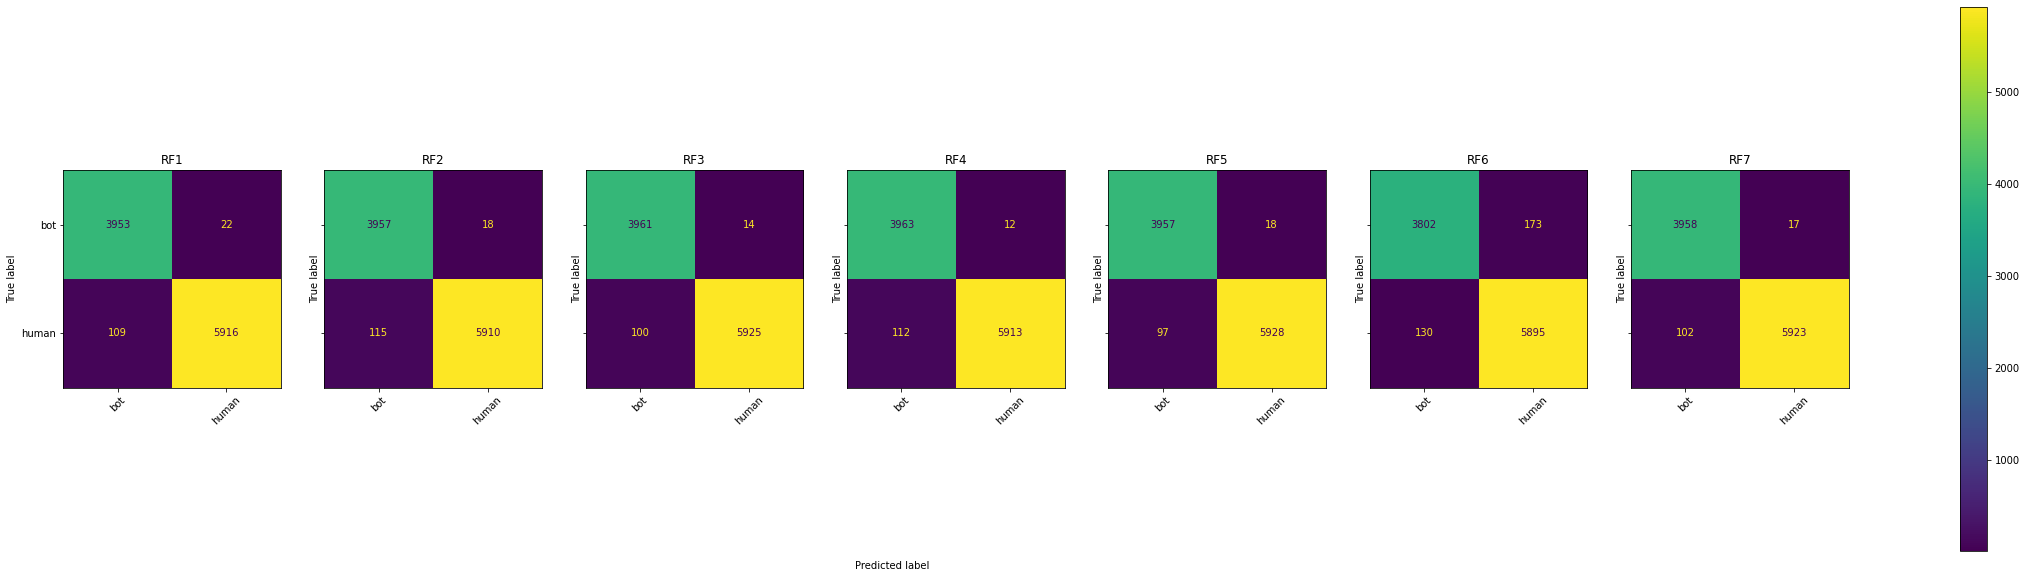

In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test6"])
    cf_matrix = confusion_matrix(y["test6"], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
X["test1"].head()

,favourites_count,followers_count,favourites_growth_rate,followers_friends_ratio,friends_growth_rate,statuses_count,listed_count,friends_count,followers_growth_rate,verified,tweet_freq,listed_growth_rate,name_length,description_length,screen_name_length,default_profile,profile_use_background_image,num_digits_in_screen_name,num_digits_in_name
8706,-0.495691,-0.024490,-0.127385,-0.029440,-0.061483,-0.400277,-0.054053,-0.099078,-0.029440,-0.087248,-0.097445,-0.053381,-0.198301,1.377583,1.508441,0.50834,0.365248,3.418531,-0.198087
96812,-0.514881,-0.027307,-0.141517,-0.050819,-0.079391,-0.415425,-0.054053,-0.106259,-0.050819,-0.087248,-0.113559,-0.053381,0.935551,1.656695,-0.890149,0.50834,0.365248,-0.513856,-0.198087
61110,-0.514843,-0.027534,-0.135715,-0.051281,-0.084472,-0.425769,-0.054053,-0.131792,-0.051281,-0.087248,-0.107737,-0.053381,-1.332153,-1.283290,1.508441,0.50834,0.365248,-0.022308,-0.198087
1044,-0.514996,-0.027534,-0.141541,-0.051281,-0.084472,-0.425813,-0.054053,-0.131792,-0.051281,-0.087248,-0.115518,-0.053381,-1.048690,-0.687850,-0.490384,0.50834,0.365248,-0.513856,-0.198087
32082,-0.513499,-0.026890,-0.140898,-0.048570,0.012690,-0.275975,-0.049228,0.103991,-0.048570,-0.087248,-0.053288,-0.034086,3.203255,0.242525,1.508441,0.50834,0.365248,3.418531,-0.198087


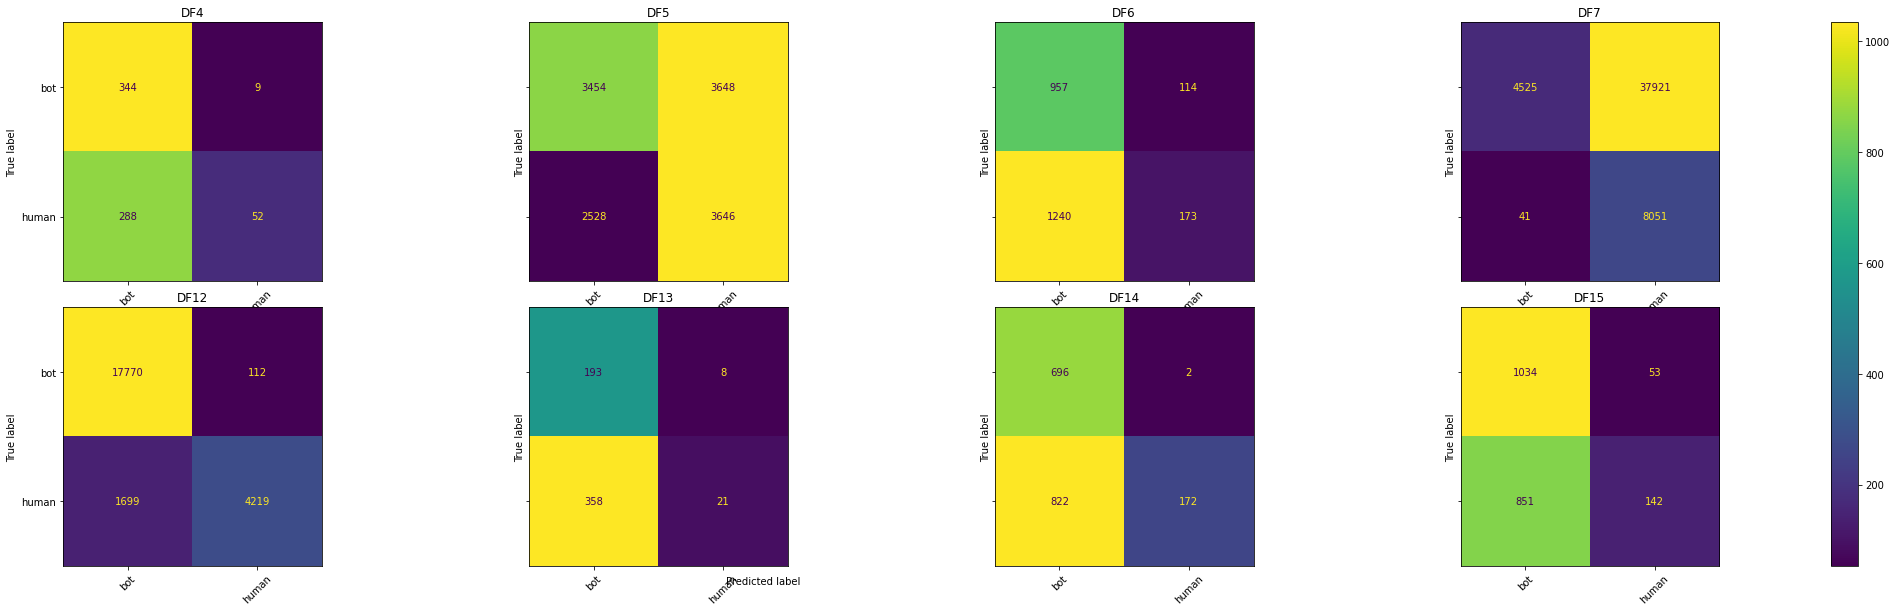

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,DF4,0.544304,0.974504,0.698477,353,0.852459,0.152941,0.259352,340,0.571429
1,DF5,0.577399,0.486342,0.527973,7102,0.499863,0.590541,0.541432,6174,0.534800
2,DF6,0.435594,0.893557,0.585679,1071,0.602787,0.122435,0.203529,1413,0.454911
3,DF7,0.991021,0.106606,0.192504,42446,0.175128,0.994933,0.297832,8092,0.248842
4,DF12,0.912733,0.993737,0.951514,17882,0.974140,0.712910,0.823300,5918,0.923908
5,DF13,0.350272,0.960199,0.513298,201,0.724138,0.055409,0.102941,379,0.368966
6,DF14,0.458498,0.997135,0.628159,698,0.988506,0.173038,0.294521,994,0.513002
7,DF15,0.548541,0.951242,0.695828,1087,0.728205,0.143001,0.239057,993,0.565385


In [ ]:
datasets=["DF4","DF5","DF6","DF7","DF12","DF13","DF14","DF15"]
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])

f, axes = plt.subplots(2, 4, figsize=(40, 10), sharey='row')

for index,dataset in enumerate(datasets):
  test = pd.read_csv(f'PATH/{dataset}.csv.gz',compression='gzip',lineterminator='\n');
  test= test.sample(frac=1).reset_index(drop=True)

  y_new_predict={}
  for i, (key, clas_f) in enumerate(classifer.items()):
    y_new_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(test.drop(['class'],axis=1))
  output_prediction=list()
  for index_2,value in enumerate(y_new_predict["test1"]):
    if [y_new_predict["test1"][index_2],y_new_predict["test2"][index_2],y_new_predict["test3"][index_2],y_new_predict["test4"][index_2],y_new_predict["test5"][index_2],y_new_predict["test6"][index_2],y_new_predict["test7"][index_2]].count("bot")>3:
      output_prediction.append("bot")
    else:
      output_prediction.append("human")
  output_prediction = np.array(output_prediction)

  classifer_accuracy_row=[dataset]
  for index_2,(key,value) in enumerate(classification_report(test['class'], output_prediction,output_dict=True).items()):
    if key in ["bot","human"]:
      classifer_accuracy_row.extend([*value.values()])
    elif key=="accuracy":
      classifer_accuracy_row.append(value)
  classifer_accuracy_result.loc[index]=classifer_accuracy_row

  cf_matrix = confusion_matrix(test['class'], output_prediction)
  disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
  disp.plot(ax=axes[int(np.floor(index/4))][index%4], xticks_rotation=45)
  disp.ax_.set_title(dataset)
  disp.im_.colorbar.remove()
  disp.ax_.set_xlabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)